# Getting Started with Clearwater-Riverine

## Overview
ClearWater-Riverine is a two-dimensional (2D) water quality model for complex river systems and floodplains. It is developed by the Environmental Laboratory, U.S Army Engineer Research and Development Center (ERDC). The intent of this model is to simulate the transport (advection and diffusion) of heat and water quality constituents in riverine systems by integrating it with ERDC's ClearWater (Corps Library for Environmental Analysis and Restoration of Watersheds modules. 

## Objective
This notebook demonstrates how to use Clearwater-Riverine to model advection and diffusion on a simple 5x10 unstructured model mesh.

## Model Set-Up

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
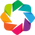

In [37]:
# import packages
import holoviews as hv
hv.extension("bokeh")

Next, we'll need to import Clearwater Riverine. While the package is still under development, the best way to install is with `conda-develop`. You can do so by running the cell below after updating to point to the path to your local clone of `Clearwater-riverine`'s `src` code on your on computer:

In [ ]:
!conda-develop /path/to/your/repository/ClearWater-riverine/src/

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
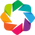

In [1]:
import clearwater_riverine as cwr

## Instantiate Clearwater-Riverine

In [19]:
root = "../tests/data/simple_test_cases/plan01_10x5"
flow_field_fpath = f'{root}/clearWaterTestCases.p01.hdf'
initial_condition_path = f'{root}/cwr_initial_conditions_p01.csv'
boundary_condition_path = f'{root}/cwr_boundary_conditions_p01.csv'

### Define Model Mesh
Set up the Clearwater Riverine model instance with the model flow field, the user-defined diffusion coefficient. Here, we also specify `verbose` to equal `True` so that we see the model's progress as it runs.

In [20]:
transport_model = cwr.ClearwaterRiverine(
    flow_field_fpath,
    diffusion_coefficient_input=0.001,
    verbose=True,
)

Populating Model Mesh...
Calculating Required Parameters...


### Define Initial and Boundry Conditions
The user defines initial conditions and boundary conditions for the entire simulation up front. This simple demonstration has initial conditions of 100 mg/m3 and boundary conditions of the same over the entire time horizon. 

In [28]:
transport_model.initialize(
    initial_condition_path=initial_condition_path,
    boundary_condition_path=boundary_condition_path,
    units='mg/m3',
)

The model is now initialized and ready to run. We can examine the model mesh as follows:

In [29]:
transport_model.mesh

<xarray.Dataset>
Dimensions:                 (node: 66, time: 10801, nface: 80, nmax_face: 4,
                             nedge: 115, 2: 2)
Coordinates:
    node_x                  (node) float64 5e+05 5e+05 5e+05 ... 5e+05 5e+05
    node_y                  (node) float64 104.0 104.0 105.0 ... 100.0 100.0
  * time                    (time) datetime64[ns] 2023-01-01T12:00:00 ... 202...
    face_x                  (nface) float64 5e+05 5e+05 5e+05 ... 5e+05 5e+05
    face_y                  (nface) float64 104.5 104.5 104.5 ... 100.0 100.5
Dimensions without coordinates: node, nface, nmax_face, nedge, 2
Data variables: (12/18)
    mesh2d                  int32 0
    face_nodes              (nface, nmax_face) int32 0 1 2 62 1 ... 65 52 -1 -1
    edge_nodes              (nedge, 2) int32 0 1 1 2 2 62 ... 63 18 64 53 65 52
    edge_face_connectivity  (nedge, 2) int32 0 10 0 1 0 50 ... 9 77 40 78 49 79
    edges_face1             (nedge) int32 0 0 0 2 2 2 2 3 ... 48 48 47 0 9 40 49
    edges_face2             (nedge) int32 10 1 50 3 51 1 ... 74 75 76 77 78 79
    ...                      ...
    advection_coeff         (time, nedge) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    edge_vertical_area      (time, nedge) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    face_to_face_dist       (nedge) float64 1.0 1.0 0.5 1.0 ... 0.5 0.5 0.5 0.5
    coeff_to_diffusion      (time, nedge) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dt                      (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 nan
    concentration           (time, nface) float64 100.0 100.0 100.0 ... 0.0 0.0
Attributes: (12/13)
    Conventions:                       CF-1.8 UGRID-1.0 Deltares-0.10
    diffusion_coefficient:             0.001
    volume_calculation_required:       False
    face_area_calculation_required:    False
    face_area_elevation_info:          Empty DataFrame\nColumns: []\nIndex: []
    face_area_elevation_values:        Empty DataFrame\nColumns: []\nIndex: []
    ...                                ...
    face_cell_indexes_df:              Empty DataFrame\nColumns: []\nIndex: []
    face_volume_elevation_info:        Empty DataFrame\nColumns: []\nIndex: []
    face_volume_elevation_values:      Empty DataFrame\nColumns: []\nIndex: []
    boundary_data:                     Empty DataFrame\nColumns: []\nIndex: []
    units:                             Metric
    nreal:                             49

## Run Model
Let's run the model for 1000 timesteps:

In [30]:
for i in range(1001):
    transport_model.update()

## Plot Results

### Timeseries
We can see that the model runs for the first 1,000 timesteps in the timeseries plots below:

In [42]:
# plot full time horizon
hv.Curve(
    transport_model.mesh.concentration.isel(nface=1)
)

:Curve   [time]   (concentration)

In [43]:
# plot first 1000 timesteps
hv.Curve(
    transport_model.mesh.concentration.isel(nface=1, time=slice(0,1000))
)

:Curve   [time]   (concentration)

We can run for another 1000 timesteps and see how the output plot changes:

In [45]:
for i in range(1001):
    transport_model.update()

In [46]:
# plot full time horizon
hv.Curve(
    transport_model.mesh.concentration.isel(nface=1)
)

:Curve   [time]   (concentration)

In [48]:
# plot first 1000 timesteps
hv.Curve(
    transport_model.mesh.concentration.isel(nface=1, time=slice(0,2000))
)

:Curve   [time]   (concentration)

### Map
We can also plot a simple dynamic map of the model results using Clearwater Riverine's built in `plot` function:

In [44]:
transport_model.plot(
    crs='EPSG:26916',
    clim=(99,101),
)

:DynamicMap   [datetime]
   :Overlay
      .Polygons.I :Polygons   [Longitude,Latitude]   (concentration,cell)
      .WMTS.I     :WMTS   [Longitude,Latitude]

## Additional Functionality

### Limiting Time Horizon
When instantiating Clearwater Riverine, users can optionally provide a `datetime_range`, with a tuple of either indices of the datetime range you wish to run, or a string of the start and end datetimes. While not important for this small model, for large flow fields, this can reduce model runtime if water quality simulation is only desired over a shorter time horizon. 

In [49]:
transport_model_limited = cwr.ClearwaterRiverine(
    flow_field_fpath,
    diffusion_coefficient_input=0.001,
    verbose=True,
    datetime_range=(2,1000)
)

Populating Model Mesh...
Calculating Required Parameters...


When looking at the time coordinate of the model mesh, we can see that it only instantiates the model over a limited time horizon, from the second timestep to the 1000th (inclusive):

In [51]:
transport_model_limited.mesh

<xarray.Dataset>
Dimensions:                 (node: 66, time: 999, nface: 80, nmax_face: 4,
                             nedge: 115, 2: 2)
Coordinates:
    node_x                  (node) float64 5e+05 5e+05 5e+05 ... 5e+05 5e+05
    node_y                  (node) float64 104.0 104.0 105.0 ... 100.0 100.0
  * time                    (time) datetime64[ns] 2023-01-01T12:00:02 ... 202...
    face_x                  (nface) float64 5e+05 5e+05 5e+05 ... 5e+05 5e+05
    face_y                  (nface) float64 104.5 104.5 104.5 ... 100.0 100.5
Dimensions without coordinates: node, nface, nmax_face, nedge, 2
Data variables: (12/17)
    mesh2d                  int32 0
    face_nodes              (nface, nmax_face) int32 0 1 2 62 1 ... 65 52 -1 -1
    edge_nodes              (nedge, 2) int32 0 1 1 2 2 62 ... 63 18 64 53 65 52
    edge_face_connectivity  (nedge, 2) int32 0 10 0 1 0 50 ... 9 77 40 78 49 79
    edges_face1             (nedge) int32 0 0 0 2 2 2 2 3 ... 48 48 47 0 9 40 49
    edges_face2             (nedge) int32 10 1 50 3 51 1 ... 74 75 76 77 78 79
    ...                      ...
    face_flow               (time, nedge) float32 -3.226e-05 4.011e-05 ... 0.0
    advection_coeff         (time, nedge) float32 -3.226e-05 4.011e-05 ... 0.0
    edge_vertical_area      (time, nedge) float32 1.0 1.0 0.0 ... 0.0 0.0 0.0
    face_to_face_dist       (nedge) float64 1.0 1.0 0.5 1.0 ... 0.5 0.5 0.5 0.5
    coeff_to_diffusion      (time, nedge) float64 0.001 0.001 0.0 ... 0.0 0.0
    dt                      (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 nan
Attributes: (12/13)
    Conventions:                       CF-1.8 UGRID-1.0 Deltares-0.10
    diffusion_coefficient:             0.001
    volume_calculation_required:       False
    face_area_calculation_required:    False
    face_area_elevation_info:          Empty DataFrame\nColumns: []\nIndex: []
    face_area_elevation_values:        Empty DataFrame\nColumns: []\nIndex: []
    ...                                ...
    face_cell_indexes_df:              Empty DataFrame\nColumns: []\nIndex: []
    face_volume_elevation_info:        Empty DataFrame\nColumns: []\nIndex: []
    face_volume_elevation_values:      Empty DataFrame\nColumns: []\nIndex: []
    boundary_data:                     Empty DataFrame\nColumns: []\nIndex: []
    units:                             Metric
    nreal:                             49

In [52]:
transport_model_limited.initialize(
    initial_condition_path=initial_condition_path,
    boundary_condition_path=boundary_condition_path,
    units='mg/m3',
)

### Running the Entire Model
Rather than updating for a certain number of timesteps, users can also simulate the entire time horizon as follows:

In [54]:
transport_model_limited.simulate_wq(
    save=False,
    input_volume_units='m3',
)

Starting WQ Simulation...
 Assuming concentration input has units of mg/m3...
     If this is not true, please re-run the wq simulation with input_mass_units, input_volume_units, and liter_conversion parameters filled in appropriately.
 25%
 50%
 75%
 100%
